In [89]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [90]:
# Load the dataset

missing_value=[np.nan,"Unknown"]
df= pd.read_csv("TaxiData.csv",na_values=missing_value)

# Clean the data and handle missing values and columns
df=df.drop('pickup_census_tract',axis=1)
df.dropna(axis=1,how='all') # Removed only those values in which entire row is null

numerical_cols= ['pickup_community_area', 'fare', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'dropoff_census_tract', 'trip_seconds', 'dropoff_community_area', 'tips']
df[numerical_cols] = df[numerical_cols].interpolate()

df[[ 'dropoff_census_tract', 'payment_type', 'company']] = df[['dropoff_census_tract', 'payment_type', 'company']].fillna(method='ffill').fillna(method='bfill')

myDATA=[ 'pickup_community_area', 'dropoff_community_area', 'pickup_latitude',	'pickup_longitude',	'dropoff_latitude','dropoff_longitude']
df[myDATA] = df[myDATA].fillna(method='ffill').fillna(method='bfill')


# Q 2.a

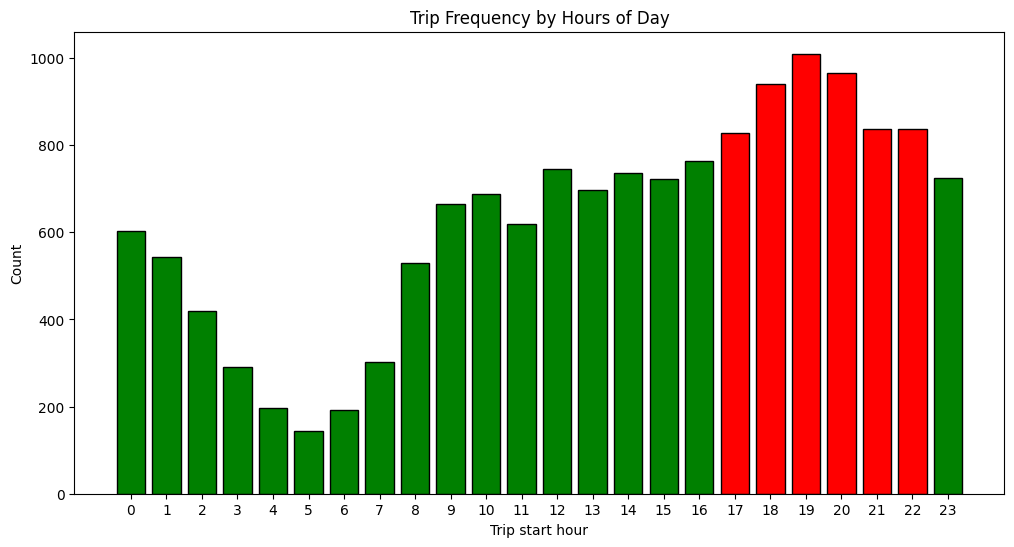

In [91]:
# data = {
#     'trip_start_hour': [19, 20, 18, 21, 22, 17, 16, 12, 14, 23, 15, 13, 10, 9, 11, 0, 1, 8, 2, 7, 3, 4, 6, 5],
#     'count': [1010, 966, 941, 838, 837, 829, 763, 745, 736, 725, 722, 698, 687, 664, 619, 602, 544, 530, 419, 302, 292, 197, 193, 143]
# }
data_hours=df['trip_start_hour'].value_counts()

# Get the indices of the top 5 busiest hours and highlight them as red
top_5_hours = data_hours.nlargest(6).index
colors = ['red' if hour in top_5_hours else 'green' for hour in data_hours.index]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(data_hours.index, data_hours.values, color=colors, edgecolor='black')
plt.xlabel('Trip start hour')
plt.ylabel('Count')
plt.title('Trip Frequency by Hours of Day')
plt.xticks(data_hours.index)  
plt.show()

### Observations
The data shows that taxi demand peaks in the evening, with the highest trip counts between 5 PM and 10 PM (e.g., 7 PM has 1010 trips). Demand gradually declines after midnight, reaching the lowest levels between 3 AM and 6 AM.
### Managing Taxi Demand

- **Driver Allocation**: Schedule more drivers during peak evening hours (5 PM to 10 PM) to meet high demand. Fewer drivers may be needed from 3 AM to 6 AM, when demand is lowest.

- **Dynamic Pricing**: Implement higher rates during peak evening hours to balance demand and attract more drivers to work during these times.


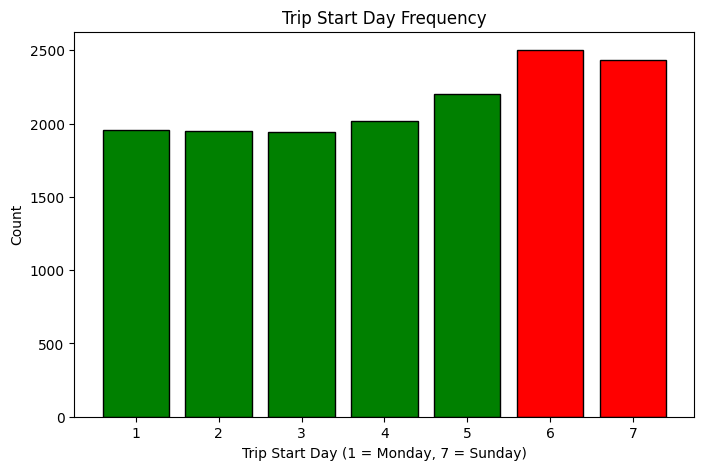

In [92]:
# data = {
#     'trip_start_day': [6, 7, 5, 4, 1, 2, 3],
#     'count': [2502, 2435, 2201, 2016, 1957, 1948, 1943]
# }

data_days=df['trip_start_day'].value_counts()

# Highlight busiest days as red
weekend_days = [6,7]
colors = ['red' if day in weekend_days else 'green' for day in data_days.index]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(data_days.index, data_days.values, color=colors, edgecolor='black')
plt.xlabel('Trip Start Day (1 = Monday, 7 = Sunday)')
plt.ylabel('Count')
plt.title('Trip Start Day Frequency')
plt.xticks(data_days.index) 
plt.show()

### Observations
The data indicates that taxi demand peaks on Saturdays (2502 trips) and Sundays (2435 trips), with demand gradually decreasing toward weekdays, hitting the lowest on Wednesday (1943 trips).
### Managing Taxi Demand

- **Driver Allocation**: Schedule more drivers on weekends (especially Saturdays and Sundays) when demand is highest.

- **Dynamic Pricing**: Implement higher pricing on weekends to balance demand and encourage more drivers to work during peak days.

- **Fleet Maintenance**: Schedule vehicle maintenance midweek to minimize the impact on service availability during peak weekend demand.

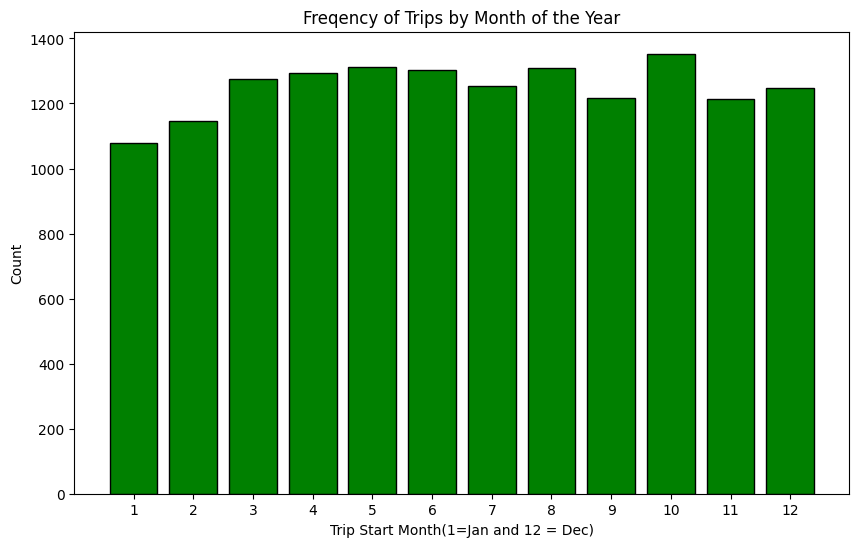

In [93]:
# data = {
#     'trip_start_month': [10, 5, 8, 6, 4, 3, 7, 12, 9, 11, 2, 1],
#     'count': [1353, 1311, 1308, 1302, 1293, 1275, 1255, 1247, 1217, 1215, 1147, 1079]
# }

data_months=df['trip_start_month'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(data_months.index, data_months.values, color='green', edgecolor='black')
plt.xlabel('Trip Start Month(1=Jan and 12 = Dec)')
plt.ylabel('Count')
plt.title('Freqency of Trips by Month of the Year')
plt.xticks(range(1, 13))  # Label months from 1 to 12
plt.show()


### Observations
The data shows peak taxi demand in October (1353 trips), May (1311), and August (1308), likely due to holidays and summer activities. Demand is lowest in January (1079) and February (1147), which may be due to colder weather or fewer events.

### Managing Taxi Demand

- **Driver Allocation**: Schedule more drivers for peak months (e.g., October, May) and weekends, with fewer drivers needed in low-demand months (e.g., January, February).

- **Dynamic Pricing**: Implement higher prices during peak months to balance supply and demand, encouraging driver availability.

- **Maintenance**: Schedule fleet maintenance in low-demand months to minimize the impact on service availability.

## Q2.b

### Q 2.b.a Identify peak hours

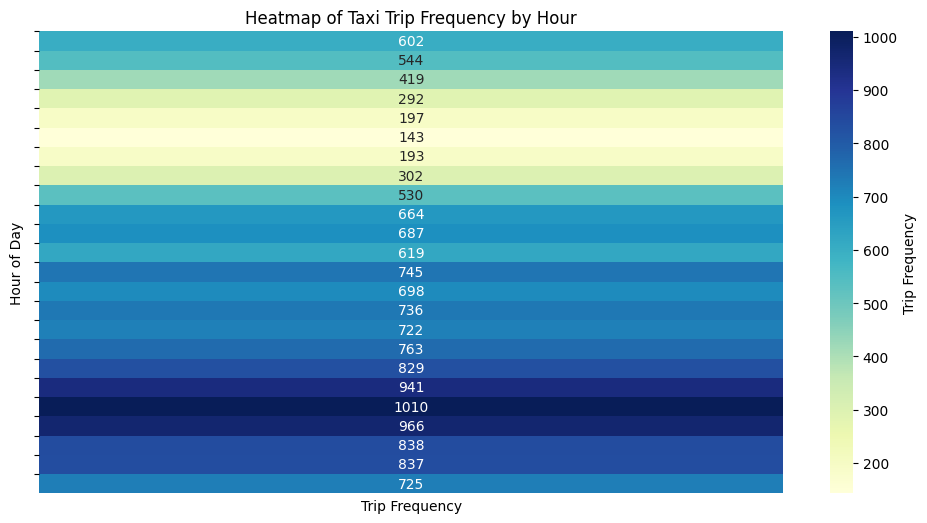

In [94]:

trip_hours = np.zeros((24, 1))  # Create an array for 24 hours
trip_hours[:, 0] = 0  #Initialize all counts to zero

# Filling the counts based on provided data
for hour, count in zip(data_hours.index, data_hours.values):
    trip_hours[hour, 0] = count

plt.figure(figsize=(12, 6))
sns.heatmap(trip_hours, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Trip Frequency'})
plt.title("Heatmap of Taxi Trip Frequency by Hour")
plt.xlabel("Trip Frequency")
plt.ylabel("Hour of Day")
plt.xticks([])  
plt.yticks(np.arange(24), rotation=0)  # Show all 24 hours
plt.show()


### Q 2.b.b Distance analysis during peak hour

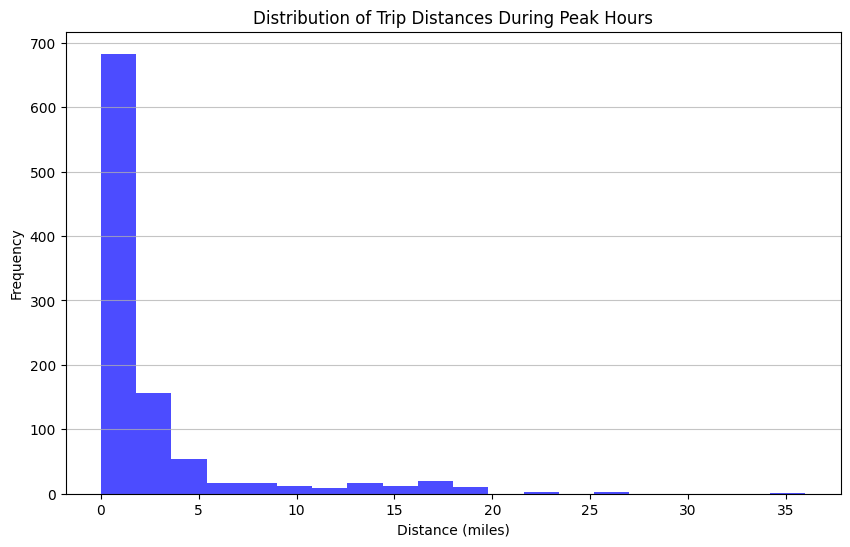

In [95]:
peak_hours = df[df['trip_start_hour'] == 19]

trip_distances = peak_hours['trip_miles']  
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(trip_distances, bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Trip Distances During Peak Hours")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

### Q 2.b.c Impact of Peak Hours and Trip Distance on Taxi Efficiency



- **Trip Distance**: Most taxi rides (90%) are short (0-5 miles), with only a few longer trips.

- **Peak Hour Effects**:
  - Increased demand during peak hours leads to congestion and longer wait times.
  - Congestion extends travel times, even for short trips, impacting customer satisfaction.

- **Service Efficiency**:
  - Longer wait times reduce operational efficiency and driver revenue.
  - Route management is necessary to avoid congested areas.

## Q 2.c

### Q 2.c.a Plot histograms for trip duration and trip distance

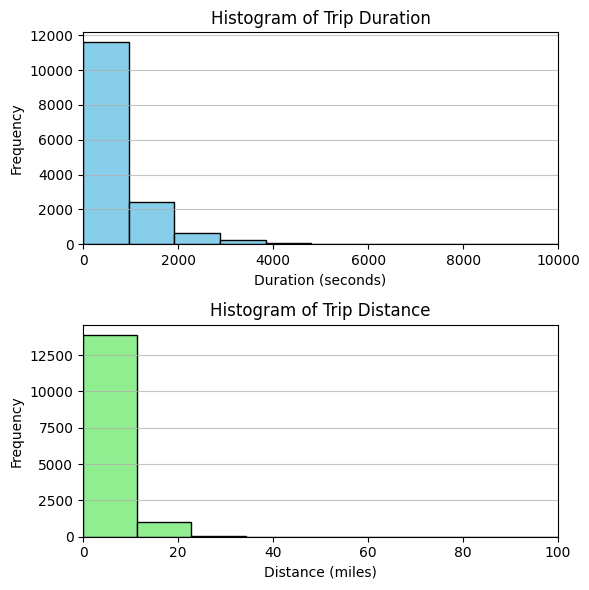

count    15002.000000
mean       777.840421
std        977.564039
min          0.000000
25%        360.000000
50%        540.000000
75%        960.000000
max      72120.000000
Name: trip_seconds, dtype: float64
count    15002.000000
mean         2.872820
std         15.276007
min          0.000000
25%          0.000000
50%          1.000000
75%          2.500000
max       1710.000000
Name: trip_miles, dtype: float64


In [96]:
trip_duration = df['trip_seconds']
trip_distance = df['trip_miles']

# Plotting histograms
plt.figure(figsize=(6, 6))

# Histogram for Trip Duration
plt.subplot(2, 1, 1)
plt.hist(trip_duration, bins=75, color='skyblue', edgecolor='black')
plt.title('Histogram of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim(0,10000)
plt.grid(axis='y', alpha=0.75)

# Histogram for Trip Distance
plt.subplot(2, 1, 2)
plt.hist(trip_distance, bins=150, color='lightgreen', edgecolor='black')
plt.title('Histogram of Trip Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()
print(trip_duration.describe())
print(trip_distance.describe())

### Q 2.c.b Use a scatter plot to show the relationship between trip

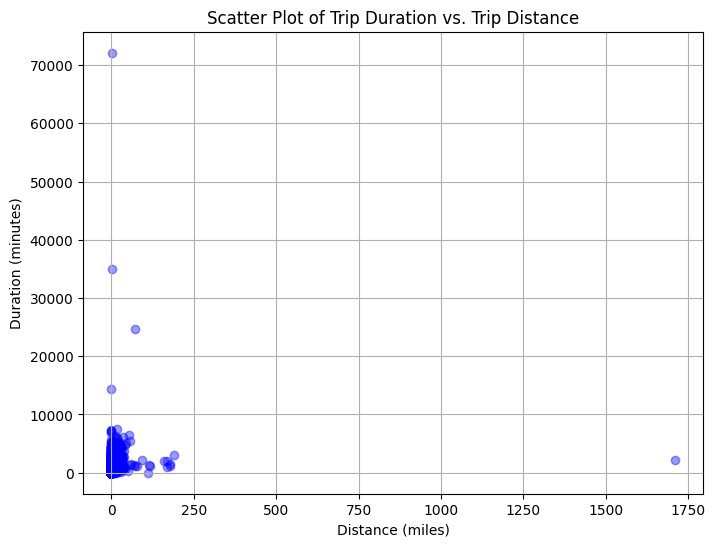

In [97]:
# Sample data
trip_duration = df['trip_seconds']
trip_distance = df['trip_miles']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(trip_distance, trip_duration, color='blue', alpha=0.4)
plt.title('Scatter Plot of Trip Duration vs. Trip Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

Remove the outliers using Inter-Quartile-Range(IQR) method

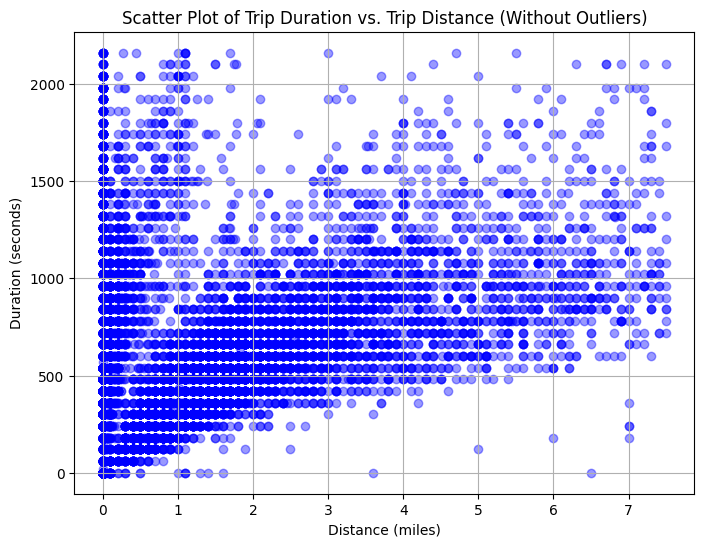

In [98]:

# Calculate IQR for trip_duration
Q1_duration = trip_duration.quantile(0.25)
Q3_duration = trip_duration.quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

# Calculate IQR for trip_distance
Q1_distance = trip_distance.quantile(0.25)
Q3_distance = trip_distance.quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

# Set bounds for trip_duration and trip_distance
lower_bound_duration = Q1_duration - 2 * IQR_duration
upper_bound_duration = Q3_duration + 2 * IQR_duration

lower_bound_distance = Q1_distance - 2 * IQR_distance
upper_bound_distance = Q3_distance + 2 * IQR_distance

# Filter the DataFrame to remove outliers
filtered_df = df[
    (trip_duration >= lower_bound_duration) & (trip_duration <= upper_bound_duration) &
    (trip_distance >= lower_bound_distance) & (trip_distance <= upper_bound_distance)
]

# Re-define filtered features
filtered_trip_duration = filtered_df['trip_seconds']
filtered_trip_distance = filtered_df['trip_miles']

# Plot scatter plot without outliers
plt.figure(figsize=(8, 6))
plt.scatter(filtered_trip_distance, filtered_trip_duration, color='blue', alpha=0.4)
plt.title('Scatter Plot of Trip Duration vs. Trip Distance (Without Outliers)')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (seconds)')
plt.grid(True)
plt.show()

### Q 2.c.c Observations:


#### Outliers:

- There is a significant vertical outlier at relatively small distances with a duration of approximately 70,000 seconds (~19.4 hours) and a few others in the 20,000-35,000 second range (5.5-9.7 hours). This could represent a faulty data or a trip with unusual delays or stops.
- There is one isolated point at around 1,700 miles with a relatively short duration, which could represent an unusual long-distance trip, possibly by air rather than ground transportation

#### Main Distribution:

- The majority of trips (about 2/3rd) have a duration less than 1000 seconds(~15 minutes) and are likely to be short trips within the same city or nearby areas.
- The duration for long-distance trips are linear and consistent (not much deviation) which are likely to be trips between cities or states.

## Q 2.d

### Q 2.d.a Identify seasonal peaks and lows

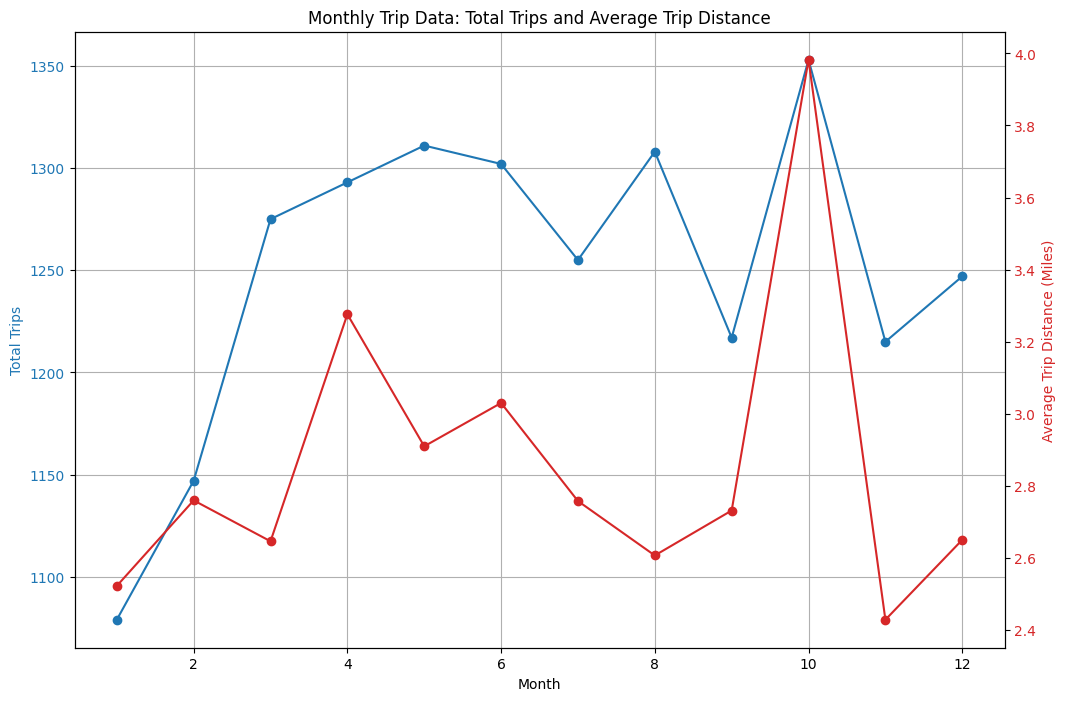

In [99]:
# Group by month and calculate total trips and average distance
M_data = df.groupby('trip_start_month').agg(
    total_trips=('trip_miles', 'count'),
    avg_trip_distance=('trip_miles', 'mean')
).reset_index()

# Create a figure and axis for the subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create the first line chart for total trips
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Trips', color='tab:blue')
ax1.plot(M_data['trip_start_month'], M_data['total_trips'], color='tab:blue', marker='o', label='Total Trips')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the average trip distance
ax2 = ax1.twinx()
ax2.set_ylabel('Average Trip Distance (Miles)', color='tab:red')
ax2.plot(M_data['trip_start_month'], M_data['avg_trip_distance'], color='tab:red', marker='o', label='Avg Trip Distance')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and grid
plt.title('Monthly Trip Data: Total Trips and Average Trip Distance')
ax1.grid(True)

# Show plot
plt.show()

### Q 2.d.b. Monthly Trip Data Insights and Resource Allocation



#### Peak Periods:
October shows both the highest total trips (~1350) and highest average trip distance (~4.0 miles).
  - This dramatic spike suggests a period requiring **maximum** resource deployment.
  - The convergence of high trip volume and longer distances means vehicles will be occupied for longer periods.

#### Seasonal Patterns:
- There's a general increase in total trips from early months to mid-year (months 4-6).
- A noticeable dip occurs around September.
- The year ends with relatively high trip counts but shorter average distances in December.

#### Resource Allocation:

- **Vehicle Fleet Management**:
  - Consider redistributing vehicles from areas with shorter trips to support areas with longer distances during peak periods.
  - Plan maintenance schedules for **low-demand periods** (e.g., January).

- **Staffing Considerations**:
  - Increase staff during **October** to handle the spike in demand.
  - Build **buffer capacity** for **October operations** to ensure service reliability.

## Q 2.e

### Q 2.e.a Distance trends for peak and non-peak hours.

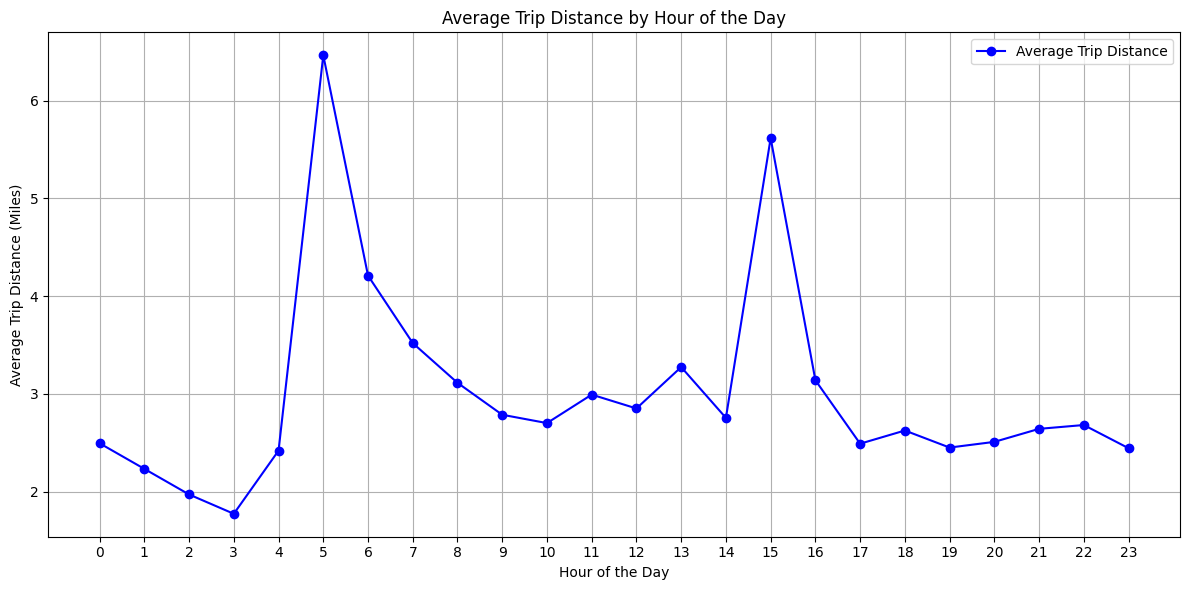

In [100]:
# Ensure trip_start_timestamp is in datetime format

hourly_data = df.groupby('trip_start_hour').agg(
    avg_trip_distance=('trip_miles', 'mean')
).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(hourly_data['trip_start_hour'], hourly_data['avg_trip_distance'], marker='o', color='blue', label='Average Trip Distance')
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (Miles)')
plt.xticks(hourly_data['trip_start_hour'])  # Ensure all hours are shown
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Q 2.e.b Observation

#### Major Distance Peaks:
These peaks correspond to regular passengers like office workers and students, suggesting an early-morning to early-afternoon schedule.

#### Notable Transition Periods:

- Sharp increase in distance between 3:00-5:00 AM
- Gradual decline in distance from 6:00-10:00 AM
- Steady state during midday
- Sharp spike again at 15:00 (3 PM)

#### Practical Implications:

Could implement specialized service for the consistent long-distance early morning commuters